# Quantum Computing Basics for Telecom: Entanglement, QFT, and Phase Control with Qiskit

**Overall Goal:** To provide a practical, intuition-driven introduction to fundamental quantum concepts (entanglement, QFT, phase) and their relevance to telecommunications, using IBM Qiskit.

---

## Section 0: Getting Started & Warm-Up

**Objective:** Ensure attendees are ready for hands-on work and provide a quick recap of basic quantum concepts and Qiskit setup.

### Key Concepts (Intuition-Focused):

* **Qubits:** Unlike classical bits (which are 0 or 1), qubits can be 0, 1, or a *superposition* of both. Think of it like a spinning coin before it lands.
* **Quantum Gates:** These are operations that manipulate qubit states, similar to how logic gates (AND, OR, NOT) manipulate classical bits.
* **Measurement:** When you measure a qubit in superposition, it "collapses" to either a 0 or a 1 with a certain probability.
* **Qiskit:** IBM's open-source SDK for working with quantum computers and simulators.

---

### Setup & First Circuit

First, if you're running this in a new environment (like Google Colab), you'll need to install Qiskit. You only need to run this once per session.

In [ ]:
# Run this cell if Qiskit is not already installed
!pip install qiskit qiskit-aer matplotlib
!pip install pylatexenc

Now, let's import the necessary components and build a very simple 1-qubit circuit to confirm everything is working.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Qiskit, Qiskit Aer, and Matplotlib installed.
All necessary libraries imported.
Quantum circuit defined and configured.

Displaying Simple 1-Qubit Circuit Diagram:


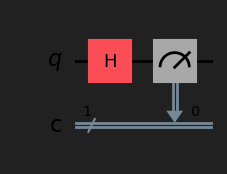

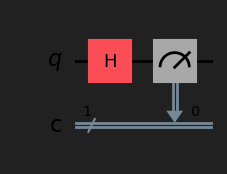

In [4]:
# Cell 1: Install Libraries, Import, Define Circuit, and Plot Circuit Diagram

# --- 1. Install necessary libraries ---
# The "-q" flag makes the installation quiet (less verbose output).
# You only need to run this once per Colab session.
!pip install -q qiskit qiskit-aer matplotlib

print("Qiskit, Qiskit Aer, and Matplotlib installed.")

# --- 2. Import necessary Qiskit components and Matplotlib ---
%matplotlib inline
# %matplotlib inline ensures Matplotlib plots are displayed directly in the notebook output.
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

print("All necessary libraries imported.")

# --- 3. Create a Quantum Circuit ---
# Defines a simple circuit with 1 qubit and 1 classical bit.
qc = QuantumCircuit(1, 1)
qc.h(0) # Apply a Hadamard gate to qubit 0 (puts it in superposition)
qc.measure(0, 0) # Measure qubit 0 and store result in classical bit 0

print("Quantum circuit defined and configured.")

# --- 4. Display the Circuit Diagram ---
# qc.draw(output='mpl') returns a Matplotlib Figure object.
# By making it the last expression in this cell, Colab will automatically display it.
print("\nDisplaying Simple 1-Qubit Circuit Diagram:")
circuit_figure = qc.draw(output='mpl', style={'backgroundcolor': '#212121', 'line_color': '#e0e7ff', 'plot_empty_cell': False, 'cregbundle': True})
circuit_figure # This line ensures the Figure object is the last expression for auto-display

Starting simulation...

Measurement Counts:
{'0': 508, '1': 516}

Simulation complete. Now plotting results.
Verifying Matplotlib functionality with an independent test plot:


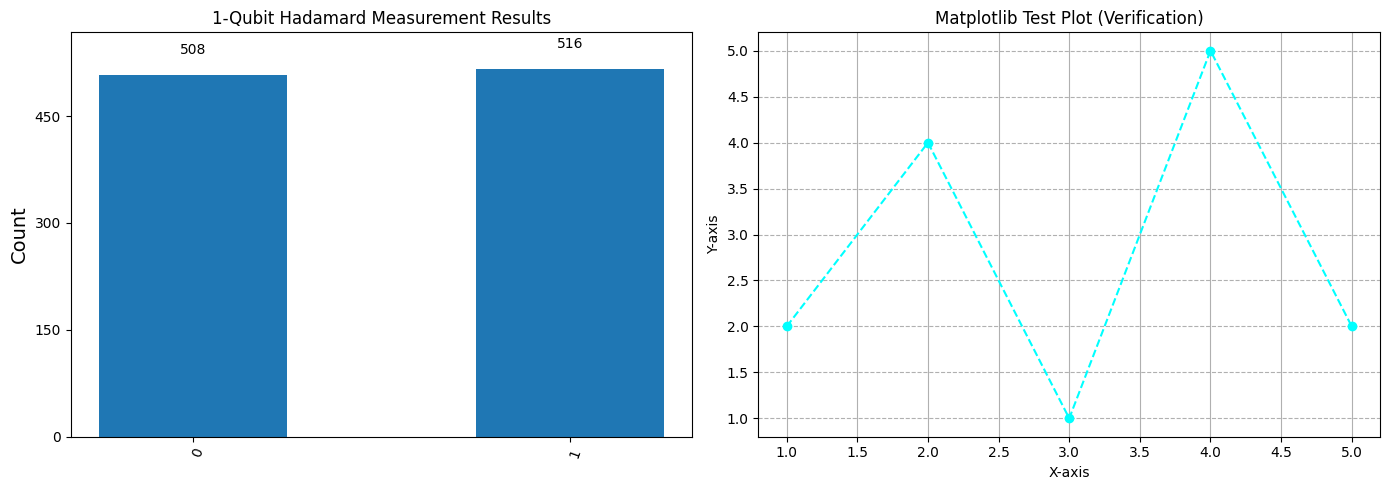


If you see approximately 50% '0' and 50% '1' in the counts and histogram, and the Matplotlib test plot, your Qiskit setup is working!


In [6]:
# Cell 2: Simulate Circuit, Get Counts, Plot Histogram, and Matplotlib Test

# --- 5. Select a backend (simulator) and execute the circuit ---
print("Starting simulation...")
simulator = AerSimulator() # Use the AerSimulator for local simulation
job = simulator.run(qc, shots=1024) # Run the circuit 1024 times
result = job.result()

# --- 6. Get the measurement counts ---
counts = result.get_counts(qc)
print("\nMeasurement Counts:")
print(counts)
print("\nSimulation complete. Now plotting results.")

# --- 7. Plotting both the Histogram and an independent Matplotlib Test Plot ---
# To display multiple plots in one cell's output, it's best to use subplots.
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) # Adjusted figsize for better spacing

# Plot the Qiskit Histogram on the first subplot (ax1)
plot_histogram(counts, ax=ax1) # Pass the axis (ax1) to plot_histogram
ax1.set_title("1-Qubit Hadamard Measurement Results")

# Plot an independent Matplotlib Test Plot on the second subplot (ax2)
print("Verifying Matplotlib functionality with an independent test plot:")
x_test = [1, 2, 3, 4, 5]
y_test = [2, 4, 1, 5, 2]
ax2.plot(x_test, y_test, marker='o', linestyle='--', color='cyan')
ax2.set_title('Matplotlib Test Plot (Verification)')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.grid(True)

plt.tight_layout() # Adjusts plot parameters for a tight layout to prevent overlap
plt.show() # Show the single figure containing both subplots

print("\nIf you see approximately 50% '0' and 50% '1' in the counts and histogram, and the Matplotlib test plot, your Qiskit setup is working!")

---

## Section 1: The Magic of Entanglement – Bell State Creation

**Objective:** Understand entanglement intuitively and build a foundational entangled circuit.

---

### Key Concepts:

* **What is Entanglement?** Imagine two quantum particles that become intrinsically linked, no matter how far apart they are. Measuring the property of one instantaneously tells you about the property of the other. Einstein famously called this "spooky action at a distance." It's like having two coins that, when flipped, *always* land on the same side, even if you flip them light-years apart, without any prior agreement.
* **Why is Entanglement Important?** This unique quantum correlation is a fundamental resource. It's crucial for:
    * **Quantum Communication:** Enabling ultra-secure communication through Quantum Key Distribution (QKD).
    * **Quantum Teleportation:** Transferring quantum information from one location to another.
    * **Quantum Computation:** Speeding up certain computations by creating complex relationships between qubits.

---

### Building a Bell State Circuit (Intuitive Walkthrough)

We will now construct the simplest entangled state, often called a **Bell state** (specifically, the $\Phi^+$ Bell state). It involves just two qubits. Here's the recipe:

1.  **Start with Two Qubits at $|0\rangle$:** Our quantum circuit will begin with two qubits, both initialized in the $|0\rangle$ state.
2.  **Apply a Hadamard Gate (H) to Qubit 0:** This gate puts Qubit 0 into a superposition, meaning it's simultaneously $|0\rangle$ and $|1\rangle$ with equal probability. (Remember the coin spinning in the air?).
3.  **Apply a Controlled-NOT (CNOT) Gate:** This is the magic gate for entanglement! It uses Qubit 0 (the one in superposition) as the 'control' and Qubit 1 as the 'target'.
    * If Qubit 0 is $|0\rangle$, Qubit 1 remains unchanged.
    * If Qubit 0 is $|1\rangle$, Qubit 1 *flips* (from $|0\rangle$ to $|1\rangle$).
    * Because Qubit 0 is in superposition, this CNOT gate effectively links the two qubits' fates, creating entanglement.
4.  **Measure Both Qubits:** We'll then measure both qubits. If they are truly entangled, we should only see outcomes where both qubits are the same (00 or 11), never different (01 or 10).

---

### Implementation: Creating and Simulating the Bell State

Let's put this into action with Qiskit.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Qiskit, Qiskit Aer, and Matplotlib installed.

All necessary libraries imported.

Bell State Quantum Circuit defined.

Displaying Bell State Circuit Diagram (Graphical):


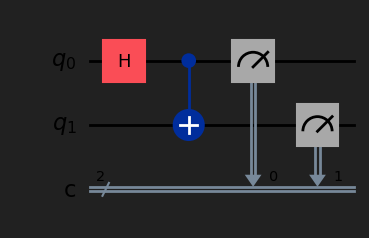

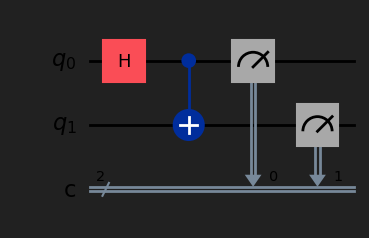

In [7]:
# Cell 1: Bell State Circuit Definition and Diagram

# --- 1. Install necessary libraries (Run this once per Colab session) ---
# If you've already run this in a previous cell in the same session, it will just verify and skip.
!pip install -q qiskit qiskit-aer matplotlib
print("Qiskit, Qiskit Aer, and Matplotlib installed.")

# --- 2. Import necessary Qiskit components and Matplotlib ---
%matplotlib inline
# %matplotlib inline ensures Matplotlib plots are displayed directly in the notebook output.
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

print("\nAll necessary libraries imported.")

# --- 3. Create a Quantum Circuit for the Bell State ---
# This circuit uses 2 qubits and 2 classical bits.
qc_bell = QuantumCircuit(2, 2)

# --- 4. Apply a Hadamard gate to the first qubit (qubit 0) ---
# This puts qubit 0 into a superposition.
qc_bell.h(0)

# --- 5. Apply a CNOT gate with qubit 0 as control and qubit 1 as target ---
# This entangles the two qubits, creating a Bell State.
qc_bell.cx(0, 1)

# --- 6. Measure both qubits ---
# The measurements are stored in their corresponding classical bits.
qc_bell.measure([0, 1], [0, 1])

print("\nBell State Quantum Circuit defined.")

# --- 7. Draw the Bell State circuit diagram ---
# qc_bell.draw(output='mpl') returns a Matplotlib Figure object.
# By making it the last expression in this cell, Colab will automatically display it.
print("\nDisplaying Bell State Circuit Diagram (Graphical):")
bell_circuit_figure = qc_bell.draw(
    output='mpl',
    # Adding a style for better visibility, especially in dark mode
    style={'backgroundcolor': '#212121', 'line_color': '#e0e7ff', 'plot_empty_cell': False, 'cregbundle': True}
)
bell_circuit_figure # This line ensures the Figure object is the last expression for auto-display

Starting simulation for the Bell State circuit...

Measurement Counts (should primarily show '00' and '11'):
{'00': 484, '11': 540}

Simulation complete. Now attempting to display both the Histogram and a diagnostic test plot.
Verifying Matplotlib functionality with an independent test plot (right side):


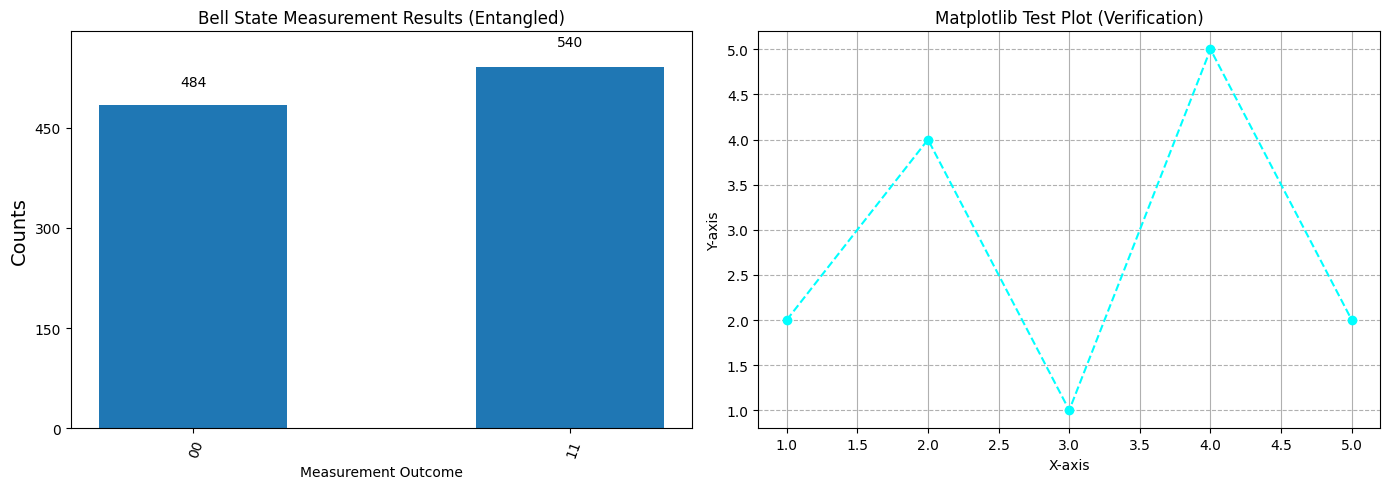


Notice how the outcomes are predominantly '00' and '11', with very few or no '01' or '10' results. This is the signature of entanglement!

If the 'Matplotlib Test Plot (Verification)' is visible but the 'Bell State Measurement Results' histogram is NOT (i.e., its subplot is blank), then the issue is very specific to Qiskit's `plot_histogram` function's internal rendering or a specific Qiskit version.


In [8]:
# Cell 2: Simulate Bell State, Get Counts, and Plot Histogram (Robust Combined Display)

# --- 1. Select the Aer simulator backend and execute the circuit ---
print("Starting simulation for the Bell State circuit...")

simulator = AerSimulator() # Use the AerSimulator for local simulation
job_bell = simulator.run(qc_bell, shots=1024) # Run the circuit 1024 times
result_bell = job_bell.result()

# --- 2. Get the measurement counts ---
counts_bell = result_bell.get_counts(qc_bell)

print("\nMeasurement Counts (should primarily show '00' and '11'):")
print(counts_bell)

print("\nSimulation complete. Now attempting to display both the Histogram and a diagnostic test plot.")

# --- 3. Create a single figure with two subplots ---
# This is the most reliable way to display multiple Matplotlib plots in one Colab cell.
fig, (ax_histogram, ax_test_plot) = plt.subplots(1, 2, figsize=(14, 5)) # Create 1 row, 2 columns of subplots

# --- 3.1 Plot the Qiskit Histogram on the first subplot (ax_histogram) ---
# By passing the 'ax' argument, plot_histogram draws directly onto this specific subplot axis.
plot_histogram(counts_bell, ax=ax_histogram)
ax_histogram.set_title("Bell State Measurement Results (Entangled)")
ax_histogram.set_xlabel("Measurement Outcome")
ax_histogram.set_ylabel("Counts") # Add a y-label for clarity

# --- 3.2 Plot an independent Matplotlib Test Plot on the second subplot (ax_test_plot) ---
# This confirms general Matplotlib functionality.
print("Verifying Matplotlib functionality with an independent test plot (right side):")
x_test = [1, 2, 3, 4, 5]
y_test = [2, 4, 1, 5, 2]
ax_test_plot.plot(x_test, y_test, marker='o', linestyle='--', color='cyan')
ax_test_plot.set_title('Matplotlib Test Plot (Verification)')
ax_test_plot.set_xlabel('X-axis')
ax_test_plot.set_ylabel('Y-axis')
ax_test_plot.grid(True)

plt.tight_layout() # Adjusts plot parameters for a tight layout to prevent overlap
plt.show() # Show the single figure containing both subplots

print("\nNotice how the outcomes are predominantly '00' and '11', with very few or no '01' or '10' results. This is the signature of entanglement!")
print("\nIf the 'Matplotlib Test Plot (Verification)' is visible but the 'Bell State Measurement Results' histogram is NOT (i.e., its subplot is blank), then the issue is very specific to Qiskit's `plot_histogram` function's internal rendering or a specific Qiskit version.")

---

## Section 2: Quantum's Whisper in Telecommunications

**Objective:** As telecom engineers, understanding the profound impact and potential integration of quantum technologies into future communication networks is crucial. This section bridges the gap between the quantum concepts we've seen and their relevance to telecommunications.

---

### Key Connections & Applications:

1.  **Quantum Cryptography (Quantum Key Distribution - QKD):**
    * **Concept:** Uses the fundamental principles of quantum mechanics (like superposition and entanglement) to establish provably secure cryptographic keys between two parties.
    * **Relevance to Telecom:** This is a game-changer for secure communication, offering a level of security unattainable with classical encryption methods. It protects data transmission over optical fibers and free-space links from even future quantum computer attacks. It's about securing the *transport* layer.
    * **How it works (briefly):** If an eavesdropper tries to intercept the quantum signals (photons), their very act of measurement disturbs the quantum state, alerting the legitimate users to the presence of an eavesdropper. This inherent detection mechanism is the foundation of its security.

2.  **Quantum Internet (Quantum Networks):**
    * **Concept:** A network that transmits quantum information (qubits) rather much like the classical internet transmits bits. It relies on the ability to generate, transmit, and measure entangled states over long distances.
    * **Relevance to Telecom:** This is the ultimate long-term vision. Imagine a global network where quantum processors can connect and share entangled qubits. This could enable distributed quantum computing, enhanced sensing (e.g., extremely precise synchronized clocks for GPS), and truly secure global communication. Existing fiber optic infrastructure could be adapted, but new quantum repeaters are needed to overcome signal loss.

3.  **Quantum Sensing and Metrology for Communication Infrastructure:**
    * **Concept:** Quantum phenomena can be harnessed to create sensors with unprecedented precision for measuring time, magnetic fields, gravity, and more.
    * **Relevance to Telecom:** Extremely precise quantum clocks could revolutionize network synchronization, enabling higher bandwidths and more efficient data transfer. Quantum sensors might also be used for better fault detection, monitoring of fiber optic cables, or even new types of signal processing at the physical layer.

4.  **Post-Quantum Cryptography (PQC):**
    * **Concept:** While QKD provides *quantum-safe* key distribution, PQC refers to classical cryptographic algorithms that are designed to be resistant to attacks by large-scale quantum computers.
    * **Relevance to Telecom:** As quantum computers become more powerful, they will be able to break many of the public-key encryption standards (like RSA and ECC) currently used to secure internet communication, financial transactions, and telecom networks. Telecom operators need to plan for a transition to PQC algorithms to ensure long-term security of their networks and user data. This is a software upgrade to existing classical systems.

5.  **Quantum Computing for 6G and Beyond:**
    * **Addressing Complex Optimization Problems:** The immense complexity of future 6G networks (e.g., dynamic resource allocation, traffic management, network slicing, interference mitigation) will push classical computing to its limits. Quantum optimization algorithms (like those using quantum annealing or variational quantum eigensolvers) are expected to find optimal solutions much faster, leading to unprecedented network efficiency, reduced latency, and energy savings.
    * **Enhancing AI and Machine Learning:** 6G networks are envisioned to be highly autonomous and AI-driven. Quantum Machine Learning (QML) can supercharge the AI capabilities required for real-time analytics, predictive maintenance, intelligent routing, and autonomous network orchestration. This includes more accurate prediction of path loss and optimal network parameter determination.
    * **Managing Massive Data Traffic:** With projected multi-terabit-per-second speeds and ultra-dense device connectivity, 6G will generate colossal amounts of data. Quantum computing's ability to process and analyze vast datasets can help in efficiently managing this traffic, enabling high-bandwidth, low-latency applications like immersive virtual reality and holographic communications.
    * **Breaking New Ground in Signal Processing:** Quantum algorithms might offer breakthroughs in complex signal processing tasks that are critical for advanced wireless communications, potentially improving aspects like MIMO detection, polar decoding, and Peak to Average Power Ratio (PAPR) minimization.

---

Quantum technology, therefore, isn't just a distant future concept for telecommunications; it's already influencing how we think about network security, architecture, and the very nature of information exchange. Your role as a telecom engineer places you at the forefront of this critical transition.

---

### References for Further Reading:

* **Quantum Key Distribution (QKD):**
    * [Quantum Key Distribution - Wikipedia](https://en.wikipedia.org/wiki/Quantum_key_distribution)
    * [Quantum Key Distribution (QKD) as a Wireless Telecommunications Security Solution (ResearchGate)](https://www.researchgate.net/publication/391285270_Quantum_Key_Distribution_QKD_as_a_Wireless_Telecommunications_Security_Solution)
    * [Quantum Network Goes the Distance Using Existing Telecom Infrastructure (The Quantum Insider)](https://thequantuminsider.com/2025/04/24/quantum-network-goes-the-distance-using-existing-telecom-infrastructure/)
    * [Quantum Key Distribution | QKD | Quantum Cryptography (ID Quantique)](https://www.idquantique.com/quantum-safe-security/quantum-key-distribution/)

* **Quantum Internet / Networks:**
    * [Quantum Internet: Technologies, Protocols, and Research Challenges (arXiv)](https://arxiv.org/html/2502.01653v1)
    * [Breakthrough for the quantum internet – from the laboratory to the real world (Deutsche Telekom)](https://www.telekom.com/en/media/media-information/archive/breakthrough-for-the-quantum-internet-1090094)
    * [What Is the Quantum Internet? (Photonics Spectra)](https://www.photonics.com/Articles/What_Is_the_Quantum_Internet/a69124)

* **Quantum Sensing and Metrology:**
    * [Researchers establish new basis for quantum sensing and communication (MIT News)](https://news.mit.edu/2025/researchers-establish-new-basis-quantum-sensing-communication-0313)
    * [Quantum Sensing - Key Use Cases (PostQuantum.com)](https://postquantum.com/quantum-sensing/quantum-sensing-use-cases/)
    * [Quantum Sensing: A revolution in detection technology (Kaila.eu)](https://kaila.eu/blog/quantum-sensing-a-revolution-in-detection-technology/)
    * [Quantum Sensing and Communication (University of Michigan)](https://quantum.engin.umich.edu/quantum-sensing/)

* **Post-Quantum Cryptography (PQC):**
    * [Integrating Post-Quantum Cryptography in Telecom (N-CoE)](https://www.n-coe.in/sites/default/files/2025-03/Integrating%20Post%20Quantum%20Cryptography%20in%20Telecom.pdf)
    * [Post-Quantum Cryptography | CSRC (NIST)](https://csrc.nist.gov/projects/post-quantum-cryptography)
    * [Post Quantum Cryptography Guidelines for Telecom Use (IETF)](https://www.ietf.org/lib/dt/documents/LIAISON/liaison-2024-02-07-gsma-sec-ls-regarding-the-publication-of-the-post-quantum-cryptography-guidelines-for-telecom-use-cases-document-in-feb-24-attachment-2.docx)
    * [Post-Quantum Cryptography Initiative (CISA)](https://www.cisa.gov/quantum)

* **Quantum Computing for 6G Networks:**
    * [(PDF) Quantum-Enabled 6G Wireless Networks: Opportunities and Challenges (ResearchGate)](https://www.researchgate.net/publication/352531315_Quantum-Enabled_6G_Wireless_Networks_Opportunities_and_Challenges)
    * [Quantum Technologies for Beyond 5G and 6G Networks: Applications, Opportunities, and Challenges (arXiv)](https://arxiv.org/html/2504.17133v1)
    * [The Security of Quantum Computing in 6G: from Technical Perspectives to Ethical Implications (arXiv)](https://arxiv.org/html/2504.10040v1)
    * [The Role of Quantum Computing in 6G Networks (Apeksha Telecom)](https://www.telecomgurukul.com/post/the-role-of-quantum-computing-in-6g-networks)

---

## Section 3: From Classical FFT to Quantum QFT – Transforming Information

**Objective:** Understand what a Fourier Transform does intuitively and appreciate the power of its quantum counterpart (Quantum Fourier Transform - QFT) without complex math, specifically in contexts where it offers a quantum advantage.

---

### Key Concepts: The Power of Frequency Analysis

* **What is a Fourier Transform (Classical)?**
    * **Intuition:** Imagine a complex musical chord playing. Your ear can often pick out the individual notes. A Fourier Transform does something similar for any complex signal.
    * It's a "frequency analyzer" that takes a signal (which might vary over time or space) and decomposes it into its constituent simple sine and cosine waves (its "frequencies") and their corresponding amplitudes and **phases**.
    * **Importance in Telecom:** The Fourier Transform is fundamental in classical signal processing and telecommunications. It's used everywhere from signal analysis (understanding what frequencies are present in a signal), to modulation/demodulation (encoding/decoding information onto carrier waves), filtering noise, image compression, and much more. It allows us to move between time/space domains and frequency domains.

* **Why Quantum Fourier Transform (QFT)?**
    * **Intuition:** The QFT performs this "frequency analysis" not on classical signals, but on *quantum states*. It can efficiently extract information about the periodicities (or frequencies) encoded within the phases of a quantum superposition state.
    * **Power:** For certain problems, the QFT can perform this analysis exponentially faster than any known classical algorithm (the Fast Fourier Transform - FFT). However, it's crucial to understand *when* this advantage applies, as it's not a direct drop-in replacement for all classical FFT uses.
    * **Fundamental Subroutine:** It's a key building block within some of the most powerful quantum algorithms, such as Shor's algorithm for factoring large numbers (which has profound implications for breaking many modern cryptographic schemes) and the Quantum Phase Estimation algorithm.

* **Complex Numbers (Very Basic Intuition):**
    * To understand waves and quantum states, we often use **complex numbers** (numbers like `a + bi`, where `i` is the imaginary unit, $\sqrt{-1}$). 
    * **Intuition:** Think of a complex number not just as a point on a 2D plane, but as a way to represent something with both a *magnitude* (how "strong" it is) and a *phase* (its "angle" or position in a cycle).
    * For waves, phase tells you where in its cycle the wave is at a given point. For quantum states, the phase of a qubit's amplitudes is crucial for allowing quantum interference to happen. The QFT works by manipulating these phases precisely.

---

### Implementation: From Classical FFT to Conceptual QFT Circuit

#### 1. Classical FFT (Brief Demo)

Let's see a super simple example of a classical Fast Fourier Transform (FFT) using NumPy. We'll take a very basic signal and see its frequency components.

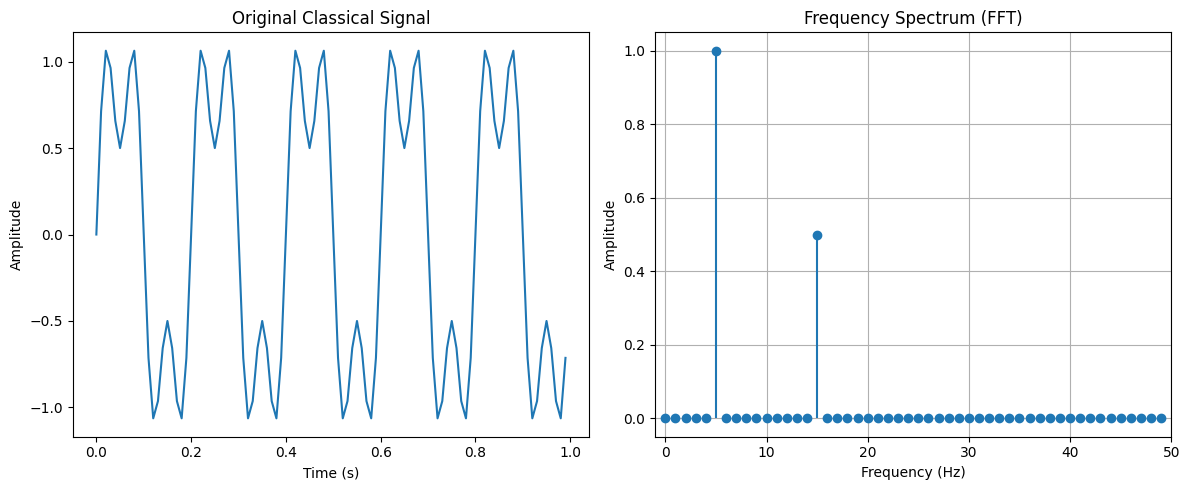

Notice how the FFT clearly shows peaks at the 5 Hz and 15 Hz frequencies that make up the signal.


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# A simple classical signal (e.g., a short pulse, or two superimposed sine waves)
# Let's create a signal that's a mix of two frequencies
sampling_rate = 100 # Hz
duration = 1      # seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Signal with two components: 5 Hz and 15 Hz
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 15 * t)

# Perform the Fast Fourier Transform (FFT)
fft_output = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=1/sampling_rate)

# We usually only care about the positive frequencies for real signals
positive_frequencies = frequencies[frequencies >= 0]
positive_fft_output = 2/len(signal) * np.abs(fft_output[frequencies >= 0]) # Normalize and take magnitude

# Plot the original signal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title('Original Classical Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the FFT results (frequency domain)
plt.subplot(1, 2, 2)
plt.stem(positive_frequencies, positive_fft_output, basefmt=" ")
plt.title('Frequency Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-1, sampling_rate / 2) # Show relevant frequency range
plt.grid(True)
plt.tight_layout()
plt.show()

print("Notice how the FFT clearly shows peaks at the 5 Hz and 15 Hz frequencies that make up the signal.")

#### 2. Quantum Fourier Transform (QFT) Circuit (General Structure)

The QFT circuit is built using two primary types of gates:
* **Hadamard gates (H):** Used to create superpositions.
* **Controlled-Phase gates (`cp` or `rz` with `cx`):** These are the core for phase manipulation. A `cp(theta)` gate applies a phase rotation `e^(i*theta)` to the target qubit *only if* the control qubit is in the $|1\rangle$ state. The angle `theta` depends on the position of the control qubit relative to the target qubit in the circuit.
* **SWAP gates:** Often placed at the end to reverse the order of qubits, as the QFT typically outputs the transformed state in reverse order of its input.

Here's a general function for an N-qubit QFT circuit. The number of qubits can be adjusted, and the circuit will scale accordingly.

```python
def qft_circuit(qc, n_qubits):
    for i in range(n_qubits):
        qc.h(i) # Apply Hadamard to the current qubit
        # Apply controlled-phase rotations with preceding qubits
        for j in range(i + 1, n_qubits):
            # The angle decreases for qubits further away
            # Formula for angle: pi / (2**(j-i))
            qc.cp(np.pi / (2**(j - i)), i, j) # cp(angle, control, target)
    
    # Apply SWAP gates to reverse the qubit order (if needed for standard output convention)
    for i in range(n_qubits // 2):
        qc.swap(i, n_qubits - 1 - i)
```

**Important Note on QFT Output Measurement:**

When the QFT is applied to a single computational basis state (like $|000\rangle$, $|001\rangle$, etc.), the resulting state is a superposition where the *magnitudes* of all basis state amplitudes are equal. This means if you simply measure the qubits after applying QFT to such an input, you will observe a **nearly uniform distribution** across all possible outcomes. The power of QFT isn't in making a single measurement outcome highly probable for an arbitrary input state, but in encoding information into the *phases* of the quantum state, which can then be exploited by subsequent quantum operations.

Let's see this in action for an initial state of $|000\rangle$.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Qiskit, Qiskit Aer, and Matplotlib installed.

All necessary libraries imported.
QFT function 'qft_circuit' defined.

3-Qubit QFT Circuit created and configured.

Displaying 3-Qubit Quantum Fourier Transform (QFT) Circuit Diagram:


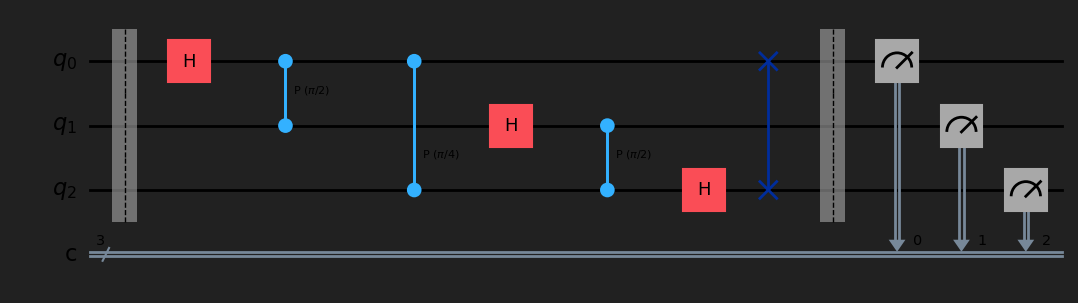

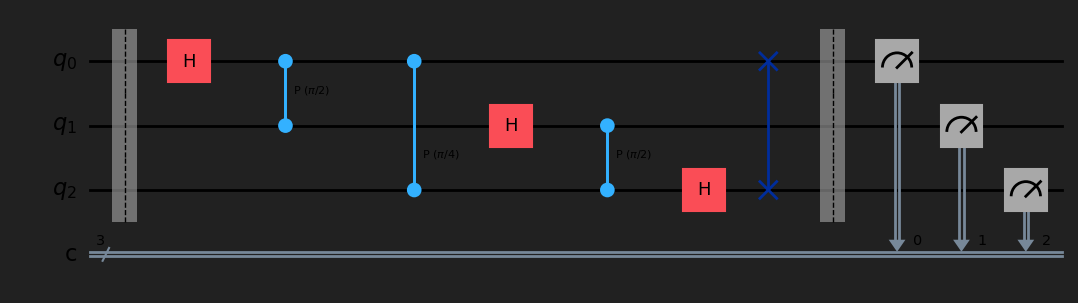

In [13]:
# Cell 1: QFT Circuit Definition and Diagram

# --- 1. Install necessary libraries (Run this once per Colab session) ---
# If you've already run this in a previous cell in the same session, it will just verify and skip.
!pip install -q qiskit qiskit-aer matplotlib
print("Qiskit, Qiskit Aer, and Matplotlib installed.")

# --- 2. Import necessary Qiskit components and Matplotlib ---
%matplotlib inline
# %matplotlib inline ensures Matplotlib plots are displayed directly in the notebook output.
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np # Needed for mathematical operations like np.pi

print("\nAll necessary libraries imported.")

# --- 3. Define the Quantum Fourier Transform (QFT) function ---
# This function applies the QFT transformation to a given quantum circuit.
def qft_circuit(qc, n_qubits):
    for i in range(n_qubits):
        qc.h(i) # Apply Hadamard gate
        for j in range(i + 1, n_qubits):
            # Apply controlled-phase (CP) gates
            qc.cp(np.pi / (2**(j - i)), i, j)

    # Apply swap gates to reverse the order of qubits (standard QFT output)
    for i in range(n_qubits // 2):
        qc.swap(i, n_qubits - 1 - i)

print("QFT function 'qft_circuit' defined.")

# --- 4. Create the QFT demonstration circuit ---
# Set the number of qubits for this QFT demonstration
num_qft_qubits = 3

# Create a quantum circuit starting with all |0>s for the QFT demo
qc_qft_uniform_demo = QuantumCircuit(num_qft_qubits, num_qft_qubits)

qc_qft_uniform_demo.barrier() # Visual separator in the circuit diagram

# Apply the QFT transformation using the defined function
qft_circuit(qc_qft_uniform_demo, num_qft_qubits)

qc_qft_uniform_demo.barrier() # Visual separator

# Measure all qubits
qc_qft_uniform_demo.measure(range(num_qft_qubits), range(num_qft_qubits))

print(f"\n{num_qft_qubits}-Qubit QFT Circuit created and configured.")

# --- 5. Draw the QFT circuit diagram ---
# qc.draw(output='mpl', fold=-1) returns a Matplotlib Figure object.
# By making it the last expression in this cell, Colab will automatically display it.
print(f"\nDisplaying {num_qft_qubits}-Qubit Quantum Fourier Transform (QFT) Circuit Diagram:")
qft_circuit_figure = qc_qft_uniform_demo.draw(
    output="mpl",
    fold=-1, # Prevents folding of the circuit for better readability of larger circuits
    style={'backgroundcolor': '#212121', 'line_color': '#e0e7ff', 'plot_empty_cell': False, 'cregbundle': True}
)
qft_circuit_figure # This line ensures the Figure object is the last expression for auto-display

Starting simulation for the QFT circuit...

Measurement Counts (for initial state |000>):
{'011': 126, '111': 131, '001': 140, '100': 128, '110': 123, '101': 127, '000': 134, '010': 115}

Simulation complete. Now attempting to display both the QFT Histogram and a diagnostic test plot.
Verifying Matplotlib functionality with an independent test plot (right side):


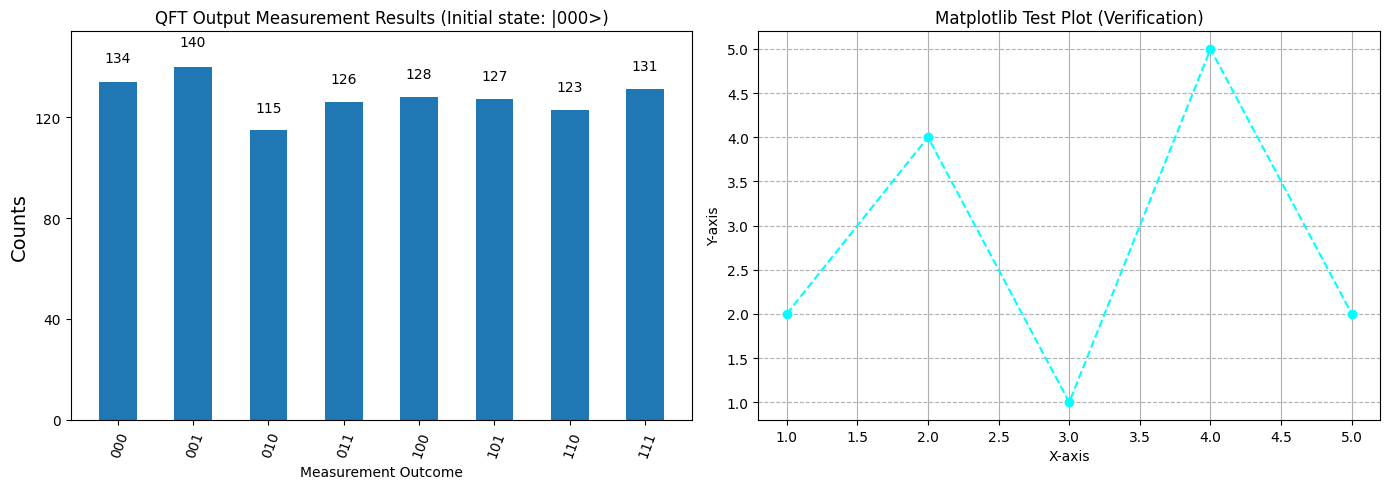


Discussion: As expected, the outcomes are roughly uniformly distributed. This is because the QFT of the |000> state is an equal superposition of all 8 basis states. While this doesn't immediately show 'peaks', it's a foundational step to understanding its power in more complex scenarios.

If both the QFT histogram and the Matplotlib test plot are visible above, your setup is working!


In [16]:
# Cell 2: Simulate QFT, Get Counts, and Plot Histogram (Robust Combined Display)

# --- 1. Select the Aer simulator backend and execute the circuit ---
print("Starting simulation for the QFT circuit...")

simulator = AerSimulator() # Use the AerSimulator for local simulation
job_qft_uniform = simulator.run(qc_qft_uniform_demo, shots=1024) # Run the circuit 1024 times
result_qft_uniform = job_qft_uniform.result()

# --- 2. Get the measurement counts ---
counts_uniform = result_qft_uniform.get_counts(qc_qft_uniform_demo)

# --- 3. Print the measurement counts ---
print(f"\nMeasurement Counts (for initial state |{'0'*num_qft_qubits}>):")
print(counts_uniform)
print("\nSimulation complete. Now attempting to display both the QFT Histogram and a diagnostic test plot.")

# --- 4. Create a single figure with two subplots ---
# This is the most reliable way to display multiple Matplotlib plots in one Colab cell.
fig, (ax_histogram, ax_test_plot) = plt.subplots(1, 2, figsize=(14, 5)) # Create 1 row, 2 columns of subplots

# --- 4.1 Plot the QFT Histogram on the first subplot (ax_histogram) ---
# By passing the 'ax' argument, plot_histogram draws directly onto this specific subplot axis.
plot_histogram(counts_uniform, ax=ax_histogram)
ax_histogram.set_title(f"QFT Output Measurement Results (Initial state: |{'0'*num_qft_qubits}>)")
ax_histogram.set_xlabel("Measurement Outcome")
ax_histogram.set_ylabel("Counts")

# --- 4.2 Plot an independent Matplotlib Test Plot on the second subplot (ax_test_plot) ---
# This confirms general Matplotlib functionality.
print("Verifying Matplotlib functionality with an independent test plot (right side):")
x_test = [1, 2, 3, 4, 5]
y_test = [2, 4, 1, 5, 2]
ax_test_plot.plot(x_test, y_test, marker='o', linestyle='--', color='cyan')
ax_test_plot.set_title('Matplotlib Test Plot (Verification)')
ax_test_plot.set_xlabel('X-axis')
ax_test_plot.set_ylabel('Y-axis')
ax_test_plot.grid(True)

plt.tight_layout() # Adjusts plot parameters for a tight layout to prevent overlap
plt.show() # Show the single figure containing both subplots

print(f"\nDiscussion: As expected, the outcomes are roughly uniformly distributed. This is because the QFT of the |{'0'*num_qft_qubits}> state is an equal superposition of all {2**num_qft_qubits} basis states. While this doesn't immediately show 'peaks', it's a foundational step to understanding its power in more complex scenarios.")
print("\nIf both the QFT histogram and the Matplotlib test plot are visible above, your setup is working!")

---

### Demonstrating QFT's Power: Detecting Hidden Frequencies/Patterns

The true power of the QFT isn't in making a single outcome more probable when applied to an arbitrary single computational basis state. Its strength lies in its ability to efficiently transform **superposition states that have an underlying periodicity or a hidden phase structure** into a form where direct measurement *does* reveal distinct peaks.

**Comparing to Classical FFT in Telecom:**
* **Classical FFT:** Excellent for analyzing known signals or signals where frequencies are somewhat isolated. It processes data sequentially.
* **Quantum QFT:** The quantum advantage comes from its ability to efficiently extract hidden information (like periods or specific 'frequencies') from superpositions. It leverages quantum parallelism and interference to analyze many possibilities simultaneously and amplify the 'correct' frequency outcomes while canceling out others.

**Potential Telecom Applications Where QFT-related Algorithms Could Offer Improvements:**

1.  **Blind Signal Separation and Source Localization:** In crowded spectrums, separating mixed signals from different users or pinpointing their locations is computationally intensive. QFT's ability to efficiently find hidden periodicities or phase relationships in a quantum representation of these signals could lead to faster, more accurate separation and localization.
2.  **Advanced Channel Estimation and Equalization:** For complex and rapidly changing wireless channels, estimating distortion parameters is crucial. QFT-based algorithms (like Quantum Phase Estimation) might estimate these parameters with higher precision or faster than classical methods, leading to more robust and higher-throughput links.
3.  **Complex Interference Cancellation:** Identifying and canceling intricate, periodic interference patterns is vital. QFT could efficiently pinpoint these patterns, enabling more precise and faster cancellation, improving Signal-to-Noise Ratio (SNR).
4.  **Enhanced Radar/Lidar Signal Processing:** In advanced sensing, extracting precise range, velocity, and angular information from complex signals is demanding. QFT-based methods could potentially enhance the resolution and speed of target detection and parameter estimation by exploiting subtle phase information.

### Hands-on Demonstration: Finding a Simulated Hidden Pattern

Let's demonstrate how QFT reveals hidden patterns. We will prepare a specific {num_qft_qubits}-qubit input state that inherently has a **simulated periodicity**. When we apply the QFT to this state, you will see clear peaks in the measurement results, demonstrating its power in detecting these underlying 'frequencies'.

For this example, we'll keep `num_qft_qubits` at 3. We will prepare the input state $\frac{1}{\sqrt{2}} (|000\rangle + |010\rangle)$. Think of this as a simplified 'signal' where the pattern `010` is present alongside `000` – implying a repeating characteristic or 'period' related to the difference between these states.

In [ ]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Function to apply QFT for n qubits (as defined previously)
def qft_circuit(qc, n_qubits):
    for i in range(n_qubits):
        qc.h(i)
        for j in range(i + 1, n_qubits):
            qc.cp(np.pi / (2**(j - i)), i, j)
    
    for i in range(n_qubits // 2):
        qc.swap(i, n_qubits - 1 - i)

# Set the number of qubits for this specific QFT demonstration
# (Note: The periodic state preparation below is tailored for 3 qubits)
num_qft_qubits = 3 

# Create a quantum circuit
qc_qft_periodic_demo = QuantumCircuit(num_qft_qubits, num_qft_qubits)

# --- Prepare the periodic input state: 1/sqrt(2) * (|000> + |010>) ---
# This is achieved by applying a Hadamard gate to qubit 1 (the middle qubit)
# Initial state: |000>
# After H(1): |0>_q2 * (1/sqrt(2)(|0>+|1>))_q1 * |0>_q0 = 1/sqrt(2) * (|000> + |010>)
qc_qft_periodic_demo.h(1) 
qc_qft_periodic_demo.barrier() # Visual separator

# Apply the QFT transformation
qft_circuit(qc_qft_periodic_demo, num_qft_qubits)

qc_qft_periodic_demo.barrier() # Visual separator

# Measure all qubits
qc_qft_periodic_demo.measure(range(num_qft_qubits), range(num_qft_qubits))

# Draw the QFT circuit
print(f"{num_qft_qubits}-Qubit QFT Circuit Diagram for Periodic Input:")
qc_qft_periodic_demo.draw(output="mpl", fold=-1) 
plt.show()

# Select the Aer simulator backend
simulator = AerSimulator()

# Execute the circuit
job = simulator.run(qc_qft_periodic_demo, shots=1024)
result = job.result()

# Get the measurement counts
counts_periodic = result.get_counts(qc_qft_periodic_demo)

print(f"\nMeasurement Counts (for initial periodic state |000> + |010>):")
print(counts_periodic)

# Plot the results
plot_histogram(counts_periodic).set_size_inches(8, 5)
plt.title(f"QFT Output Measurement Results (Initial state: |000> + |010>)")
plt.show()

print("\nObservation: Notice how the outcomes are now predominantly concentrated around '000' and '100'. This demonstrates QFT's ability to transform a state with a hidden periodicity (related to a period of 2, or 010) into a state where these 'frequencies' (0 and 4, or 000 and 100) become highly probable upon measurement. This is the core mechanism enabling quantum algorithms to solve problems faster than classical computers, such as finding periods in Shor's algorithm, and potentially for complex signal processing in telecommunications.")

---

## Section 4: The Art of Phase Control and Interference

**Objective:** Dive deeper into how phase is manipulated in quantum circuits and how quantum interference leads to computational power.

---

### Key Concepts:

* **Phase as Quantum Control:**
    * **Intuition:** In classical telecommunications, we often encode information by modulating the phase of a carrier wave. Similarly, in quantum computing, quantum operations can precisely control the *phase* of a qubit's quantum state.
    * This control over phase is subtle but incredibly powerful, as it's the key ingredient for creating quantum interference effects.

* **Quantum Interference:**
    * **Intuition:** Think of waves in water. When two waves meet, they can either reinforce each other (constructive interference) or cancel each other out (destructive interference).
    * In quantum computing, this principle applies to probability amplitudes. Quantum algorithms are designed such that:
        * **Undesirable outcomes** (wrong answers) have their probability amplitudes interfere destructively and "cancel out."
        * **Desirable outcomes** (correct answers) have their probability amplitudes interfere constructively and "reinforce" each other.
    * This intelligent manipulation of interference is where the exponential speedup of quantum algorithms comes from. It's how a quantum computer can explore many possibilities simultaneously and arrive at the correct solution with high probability, seemingly faster than a classical computer. The QFT, for example, heavily relies on precise phase rotations and subsequent interference to extract frequency information.

---

### Implementation: Demonstrating Controlled Phase and Interference

Let's observe how a controlled-phase gate manipulates the phase of a qubit and how this can lead to different measurement probabilities after subsequent operations, demonstrating interference effects.

We will use a **Controlled-Phase (CP) gate**, also known as `CU1` or `CRZ` in some contexts, or constructed from `CX` and `RZ` gates. The `CP(theta)` gate applies a phase `e^(i*theta)` to the target qubit *only if* the control qubit is in the $|1\rangle$ state. If the control is $|0\rangle$, nothing happens to the target qubit's phase.

We'll set up a 2-qubit circuit:
1.  Put both qubits into superposition using Hadamard gates.
2.  Apply a controlled-phase gate.
3.  Apply a final Hadamard to the target qubit.
4.  Measure both qubits.

In [ ]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np # For defining phase angles

# Create a 2-qubit circuit with 2 classical bits
qc_phase_control = QuantumCircuit(2, 2)

# --- Setup for Interference Demonstration ---
# Apply Hadamard to both qubits to put them into superposition
qc_phase_control.h(0)
qc_phase_control.h(1)
qc_phase_control.barrier() # Visual separator

# --- Apply a Controlled-Phase Gate ---
# The 'theta' value determines the phase shift. Try changing this!
# np.pi / 2 (90 degrees) or np.pi (180 degrees) are common to see effects.
# Example: theta = np.pi / 2 (CP(pi/2) gate)
theta_angle = np.pi / 2  # Experiment with np.pi, np.pi/4, 0, etc.
print(f"Applying a Controlled-Phase gate with theta = {theta_angle:.2f} radians ({np.degrees(theta_angle):.0f} degrees)")

# Apply the controlled-phase gate (control_qubit=0, target_qubit=1)
qc_phase_control.cp(theta_angle, 0, 1)

# An alternative way to implement a controlled-phase effect using standard gates:
# If theta_angle is not zero, uncomment these lines and comment qc_phase_control.cp above
# qc_phase_control.p(theta_angle / 2, 0) # Phase on control qubit
# qc_phase_control.p(theta_angle / 2, 1) # Phase on target qubit
# qc_phase_control.cx(0, 1)              # CNOT
# qc_phase_control.p(-theta_angle / 2, 1) # Inverse phase on target
# qc_phase_control.cx(0, 1)              # CNOT

qc_phase_control.barrier() # Visual separator

# --- Final Hadamard for Interference ---
# Apply Hadamard to the target qubit (Qubit 1) to make phase differences visible in measurement probabilities
qc_phase_control.h(1)
qc_phase_control.barrier() # Visual separator

# --- Measure both qubits ---
# As discussed, Qiskit's bitstrings are c1c0, where c0 is from Qubit 0, c1 from Qubit 1
qc_phase_control.measure([0, 1], [0, 1])

# Draw the circuit
print("Controlled-Phase & Interference Circuit Diagram:")
qc_phase_control.draw(output="mpl")
plt.show()

# Select the Aer simulator backend
simulator = AerSimulator()

# Execute the circuit
job = simulator.run(qc_phase_control, shots=1024)
result = job.result()

# Get the measurement counts
counts = result.get_counts(qc_phase_control)

print("\nMeasurement Counts:")
print(counts)

# Plot the results
plot_histogram(counts).set_size_inches(7, 5)
plt.title(f"Controlled-Phase (theta={theta_angle:.2f}) Interference Results")
plt.show()

print("\nExperiment with different 'theta_angle' values (e.g., 0, np.pi/2, np.pi) and observe how the probabilities of the '01' and '11' outcomes change. This demonstrates how subtle phase shifts, when followed by a Hadamard, can lead to dramatic changes in measurement probabilities due to quantum interference. This is the heart of how many quantum algorithms work!")

### Visualizing Phase (Optional)

While we won't implement a full visualization here, you can explore the phase of qubits more directly using Qiskit's `StatevectorSimulator` and visualization tools like `plot_bloch_multivector` or `plot_state_qsphere` after intermediate steps in a circuit (before measurement). These tools help visualize how the Bloch sphere representation of a qubit changes, including its phase, which is crucial for understanding interference.

For instance, you could run a circuit up to the point of the `cp` gate, get the statevector, and then visualize it to see the phase changes. However, for a two-qubit system, `plot_bloch_multivector` can become complex to interpret quickly, and `plot_state_qsphere` is often more suitable for multi-qubit phase visualization. These are topics for deeper dives!


---

## Section 5: Conclusion & Next Steps

**Objective:** Summarize key learnings from the workshop and encourage further exploration into quantum computing and its applications in telecommunications.

---

### Key Takeaways:

Over this workshop, we've touched upon fundamental concepts that are the bedrock of quantum computing and its relevance to your field, telecommunications:

* **Entanglement:** We saw how two qubits can become intrinsically linked, exhibiting "spooky action at a distance." This is not just a curiosity, but a powerful resource for quantum communication (like QKD) and advanced computation.
* **Quantum Fourier Transform (QFT):** We explored the intuition behind the Fourier Transform's role in classical signal analysis and introduced its quantum counterpart. The QFT is a quantum algorithm that efficiently extracts frequency information encoded in quantum states, a crucial subroutine for powerful applications like Shor's algorithm and quantum phase estimation.
* **Phase Control and Interference:** We delved into how quantum gates precisely manipulate the *phase* of qubit states. This seemingly subtle control is the mechanism that allows quantum interference to occur, where incorrect computational paths cancel out and correct paths are amplified, leading to quantum speedups for certain problems.

These concepts are not isolated; they are interconnected and form the basis for how quantum computers can potentially revolutionize various sectors, especially telecommunications.

---

### Your Role as an ICT Engineer:

As an ICT engineer, you are uniquely positioned to understand and integrate these emerging technologies. Quantum computing and quantum communications are not just abstract physics; they are becoming practical tools that will shape the next generation of networks (e.g., 6G and beyond), enhance security, and enable entirely new communication paradigms.

Your expertise in network infrastructure, signal processing, and communication protocols provides a crucial bridge between classical telecom systems and the quantum future.

---

### Next Steps for Continued Learning:

The journey into quantum computing is vast and exciting. Here are some recommendations to continue your exploration:

1.  **Experiment with this Notebook:** Play around with the code cells. Change initial states, gate parameters (like `theta_angle` in Section 4), and observe the results. This hands-on experimentation is key to building intuition.
2.  **Explore the IBM Quantum Platform:**
    * **IBM Quantum Experience:** [https://quantum-computing.ibm.com/](https://quantum-computing.ibm.com/) (Sign up for free to run circuits on real quantum hardware or more powerful simulators).
3.  **Dive Deeper with Qiskit Tutorials and Documentation:**
    * **Qiskit Learn:** [https://www.ibm.com/quantum/qiskit](https://www.ibm.com/quantum/qiskit) (Comprehensive learning path from basics to advanced topics).
    * **Qiskit Documentation:** [https://qiskit.org/documentation/](https://qiskit.org/documentation/) (Reference for all Qiskit functionalities).
4.  **Community and Events:**
    * Look out for **Qiskit Global Summer School** archives, **Qiskit Challenges**, and **QWorld** events. These provide structured learning and opportunities to engage with the quantum community.
    * Connect with other quantum enthusiasts and researchers on platforms like LinkedIn (you can find Abdulmalek Baitulmal there!).

Thank you for joining this workshop. We hope it has provided a solid foundation and sparked your interest in the exciting intersection of quantum technology and telecommunications!